## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Florencia
- Apellido: Bellone
- Legajo: 1646620

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [193]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.datasets import load_boston
warnings.filterwarnings('ignore')

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [194]:
# importo el archivo "ClusterAI_TP_dataser_diabetes" con los datos a analizar y lo guardo en la variable "diabetes".
diabetes = pd.read_csv(r'\Users\bello\Documents\Flor\CDD\ClusterAI_TP_dataset_diabetes.csv', header = 0)

In [195]:
#para corroborar que se haya cargado correctamente voy a ver el si se guardo como DataFrame y voy a visualizar las columnas
type(diabetes)

pandas.core.frame.DataFrame

In [196]:
np.shape(diabetes)

(768, 9)

Podemos ver que hay 768 datos, o mediciones de 9 parametros (ya nombrados anteriormentes, las variables que vamos a estar midiendo de las 768 muestras)

In [197]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [198]:
np.shape(diabetes)

(768, 9)

In [199]:
print('Las dimensiones del DataFrame son: ', np.ndim(diabetes))

Las dimensiones del DataFrame son:  2


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [200]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [201]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [202]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [203]:
print('La cantidad de datos nulos son: ', diabetes.isnull().sum().sum())

La cantidad de datos nulos son:  0


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

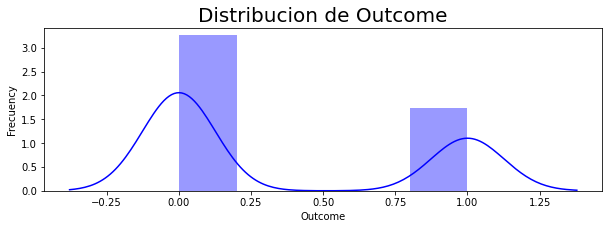

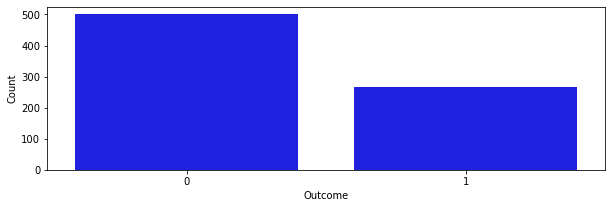

In [204]:
plt.figure(figsize=(10,3))
sns.distplot(diabetes.Outcome, color="Blue")
plt.xlabel("Outcome")
plt.ylabel("Frecuency")
plt.title('Distribucion de Outcome',size = 20)
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(diabetes.Outcome, color="Blue")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

Podemos observar que hay al rededor de 500 Pacientes que no son diabeticos (0) y al rededor de 250 que si lo son (1)

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [205]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

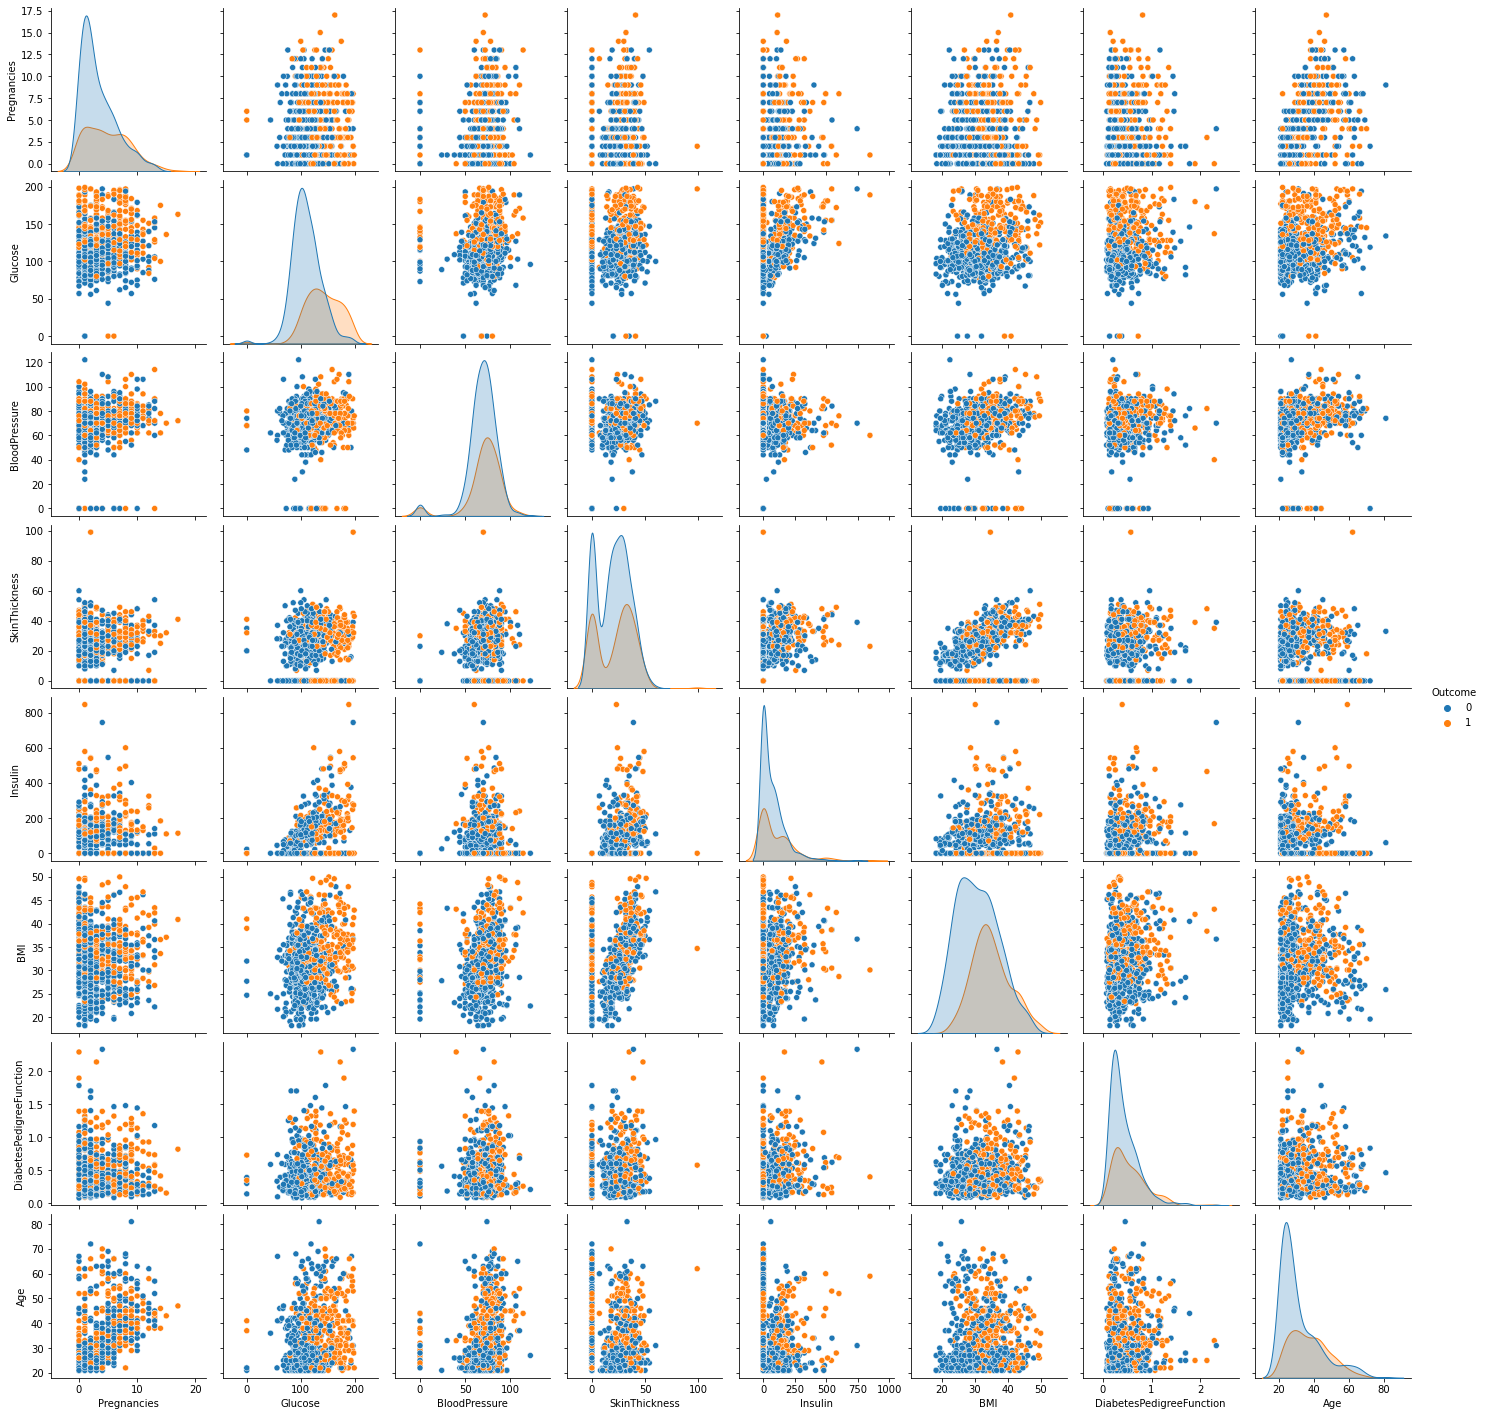

In [216]:
sns.pairplot(diabetes, hue= "Outcome")
plt.show()

En la mayoria de los parametros, ambas clases se cruzan y siguen una distribucion parecida.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

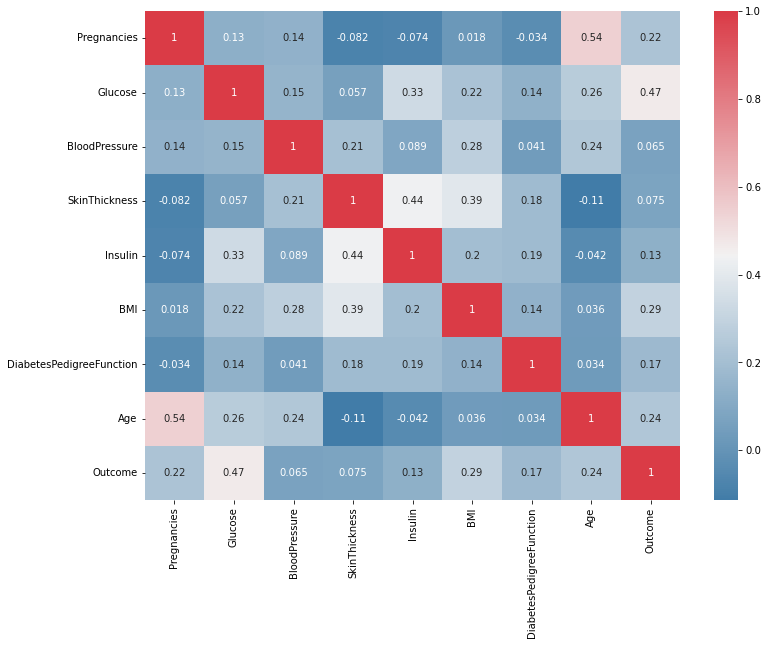

In [207]:
corrdiab = diabetes.corr()

f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrdiab,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

Las variables que mas correlacionan son Age y Pregnancies, Outcome y Glucouse. Ambos tienen una correlacion positiva menor a 1.


##### **Objetivo 8**
Hacer un histograma de la variable BMI

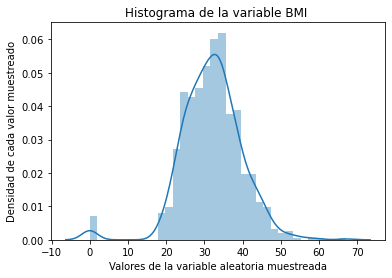

In [208]:
sns.distplot(diabetes.BMI)
plt.title("Histograma de la variable BMI ")
plt.xlabel("Valores de la variable aleatoria muestreada")
plt.ylabel("Densidad de cada valor muestreado")
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

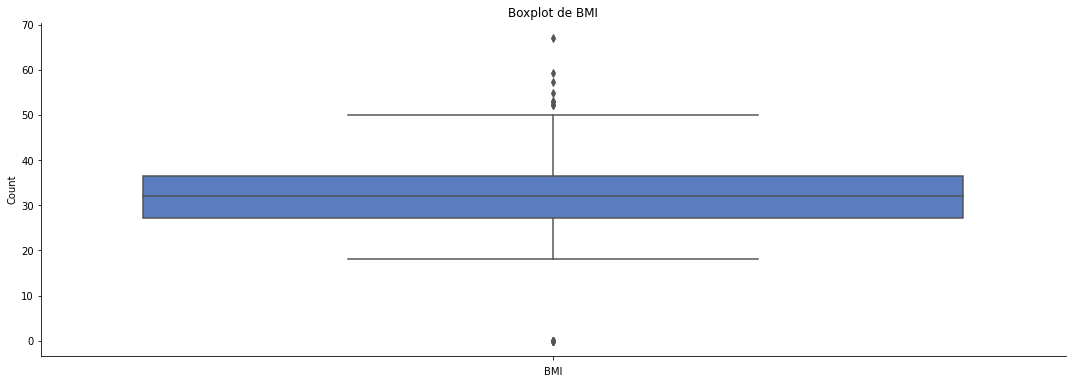

In [209]:
bxplot=sns.catplot(data=diabetes, y="BMI", kind="box", height = 5 ,aspect=3,palette = "muted")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title('Boxplot de BMI',size = 12)
plt.show()

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [210]:
''' Detection '''
# IQR
Q1 = np.percentile(diabetes['BMI'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(diabetes['BMI'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", diabetes.shape)
 
# Upper bound
upper = np.where(diabetes['BMI'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(diabetes['BMI'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
diabetes.drop(upper[0], inplace = True)
diabetes.drop(lower[0], inplace = True)
 
print("New Shape: ", diabetes.shape)

Old Shape:  (768, 9)
New Shape:  (749, 9)


Podemos ver que se eliminaron los registros fuera de los limites del boxplot, la cantidad de outliers filtrados es de 768-749=19

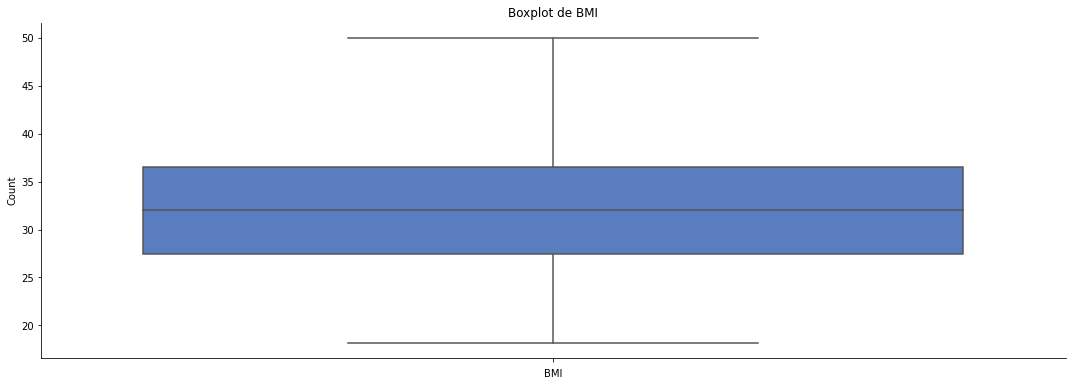

In [211]:
sns.catplot(data=diabetes, y="BMI", kind="box", height = 5 ,aspect=3,palette = "muted")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title('Boxplot de BMI',size = 12)
plt.show()

In [179]:
#no pude hacerlo de esta forma y no pude solucionar el error en ningun lado :(

# Marcas de Boxplot
low_limits = bxplot["whiskers"][0].get_ydata()
up_limits = bxplot["whiskers"][1].get_ydata()

# Valores Q1 - Q3
Q1 =  low_limits[0]
Q3 =  up_limits[0]

# whiskers: Valores extremos de las lineas que salen del intervalo [Q1-Q3]
low_whiskers =  low_limits[1]
up_whiskers = up_limits[1]

# Outliers = fliers: Valores mas alla de los whiskers 
outliers = bxplot["fliers"][0].get_ydata()

TypeError: 'FacetGrid' object is not subscriptable

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

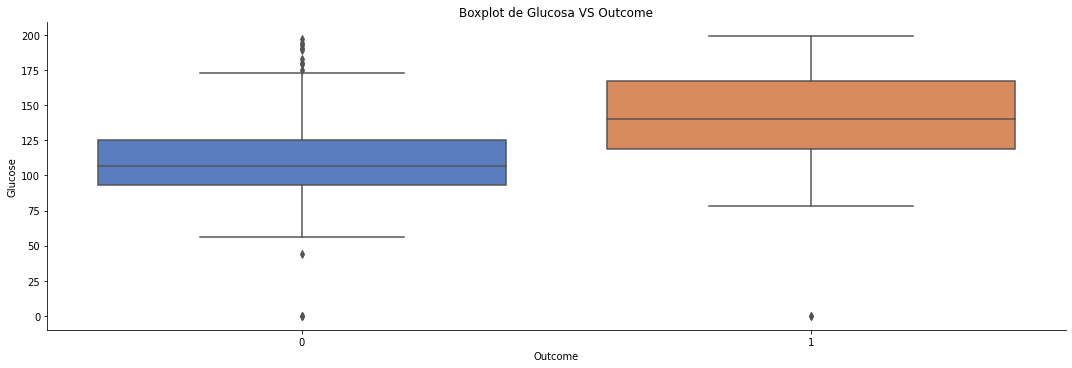

In [212]:
sns.catplot(data=diabetes, x="Outcome", y="Glucose", kind="box", height = 5 ,aspect=3,palette = "muted")
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.title('Boxplot de Glucosa VS Outcome',size = 12)
plt.show()

Podemos observar, como es esperado, que la media para los pacientes con diabetes (1) es mas elevada. Tiene una mayor dispersion y los datos se encuentran concentrados, no hay outliers como en el caso (0). 


##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

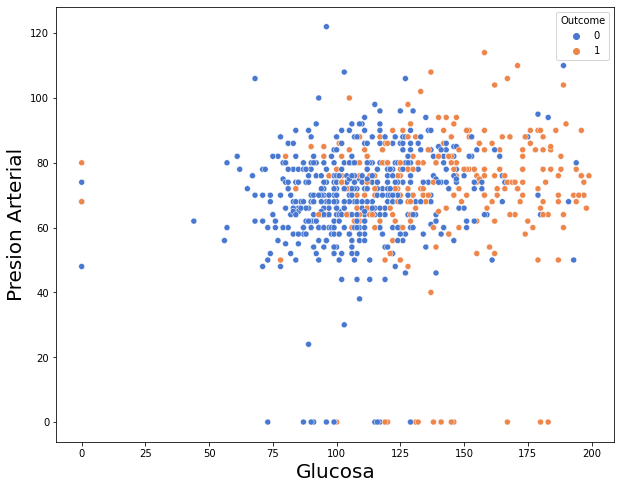

In [213]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=diabetes.Glucose,y=diabetes.BloodPressure,
                hue=diabetes.Outcome,palette='muted')
plt.xlabel("Glucosa",fontsize=20)
plt.ylabel("Presion Arterial",fontsize=20)

plt.show()

Se puede ver una mayor concentracion de personas diabeticas para niveles altos de glucosa en sangre, pero aun esto no es del todo determinista, ya que hay samples que a menores niveles de glucosa aun asi tienen diabetes. No se encuentra una diferencia en cuanto a la Presion Arterial, ambos tipos de pacientes se encuetran dentro del mismo rango.


##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [214]:
diabetes.loc[ diabetes['Age'] < 30, 'AgeBand'] = 'Rango 1'
diabetes.loc[(diabetes['Age'] > 30) & (diabetes['Age'] < 40), 'AgeBand'] = 'Rango 2'
diabetes.loc[ diabetes['Age'] > 40, 'AgeBand'] = 'Rango 3'
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBand
0,6,148,72,35,0,33.6,0.627,50,1,Rango 3
1,1,85,66,29,0,26.6,0.351,31,0,Rango 2
2,8,183,64,0,0,23.3,0.672,32,1,Rango 2
3,1,89,66,23,94,28.1,0.167,21,0,Rango 1
4,0,137,40,35,168,43.1,2.288,33,1,Rango 2


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

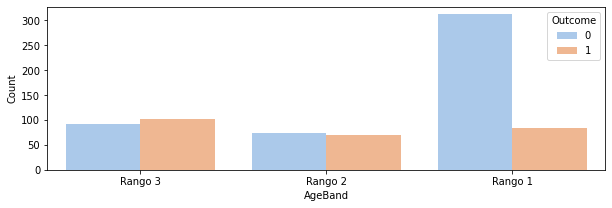

In [141]:
plt.figure(figsize=(10,3))
sns.countplot(diabetes.AgeBand, hue=diabetes.Outcome, palette = "pastel")
plt.xlabel("AgeBand")
plt.ylabel("Count")
plt.show()

Despues de este analisis podemos decir que es mayor la probabilidad de tener diabetes pasados los 40 (Rango 3) y es mas baja al ser menor de 30 (Rango 1). La cantidad de casos de gente que tiene diabetes es casi cte a lo largo de los rangos, pero en porcentaje la poblacion del rango 1 tiene mayor cantidad de pacientes no diabeticos.